In [47]:
!pip install ISLP

In [48]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplot
from ISLP import load_data

In [49]:
Hitters = load_data('Hitters')
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [50]:
Hitters.shape

(322, 20)

In [51]:
Hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [52]:
Hitters.describe().iloc[:,:4]

,AtBat,Hits,HmRun,Runs
count,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938
std,153.404981,46.454741,8.709037,26.024095
min,16.000000,1.000000,0.000000,0.000000
25%,255.250000,64.000000,4.000000,30.250000
50%,379.500000,96.000000,8.000000,48.000000
75%,512.000000,137.000000,16.000000,69.000000
max,687.000000,238.000000,40.000000,130.000000


In [53]:
np.unique(Hitters['Salary'])

array([  67.5  ,   68.   ,   70.   ,   75.   ,   80.   ,   86.5  ,
         87.5  ,   90.   ,   91.5  ,   95.   ,   97.5  ,  100.   ,
        105.   ,  110.   ,  115.   ,  120.   ,  125.   ,  130.   ,
        135.   ,  137.   ,  140.   ,  145.   ,  150.   ,  155.   ,
        160.   ,  165.   ,  172.   ,  175.   ,  180.   ,  185.   ,
        190.   ,  191.   ,  195.   ,  200.   ,  202.5  ,  210.   ,
        215.   ,  225.   ,  230.   ,  235.   ,  240.   ,  245.   ,
        247.5  ,  250.   ,  260.   ,  265.   ,  275.   ,  277.5  ,
        286.667,  297.5  ,  300.   ,  305.   ,  320.   ,  325.   ,
        326.667,  340.   ,  341.667,  350.   ,  362.5  ,  365.   ,
        375.   ,  385.   ,  400.   ,  415.   ,  416.667,  420.   ,
        425.   ,  430.   ,  431.5  ,  450.   ,  475.   ,  480.   ,
        487.5  ,  490.   ,  500.   ,  512.5  ,  517.143,  525.   ,
        530.   ,  535.   ,  550.   ,  560.   ,  575.   ,  580.   ,
        587.5  ,  595.   ,  600.   ,  612.5  ,  625.   ,  630.

In [54]:
Hitters = Hitters.dropna()
np.unique(Hitters['Salary'])
Hitters['Salary'].sum()

140948.50699999998

In [55]:
Hitters.shape

(263, 20)

In [56]:
from matplotlib.pyplot import subplots

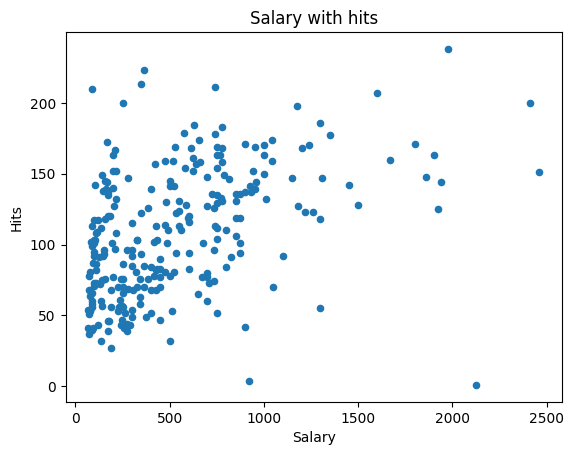

In [57]:

ax = Hitters.plot.scatter('Salary', 'Hits')
ax.set_title('Salary with hits');

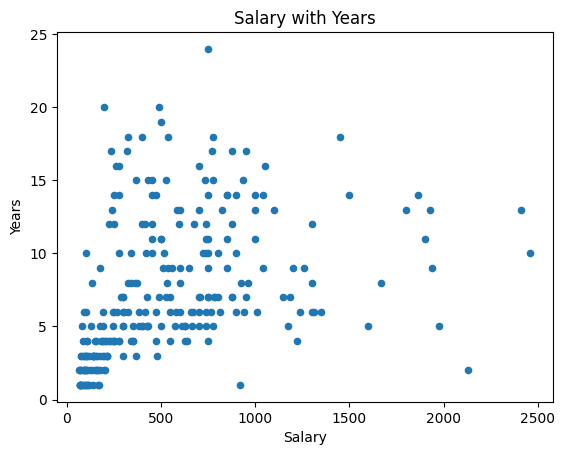

In [58]:
ax = Hitters.plot.scatter('Salary', 'Years')
ax.set_title('Salary with Years');

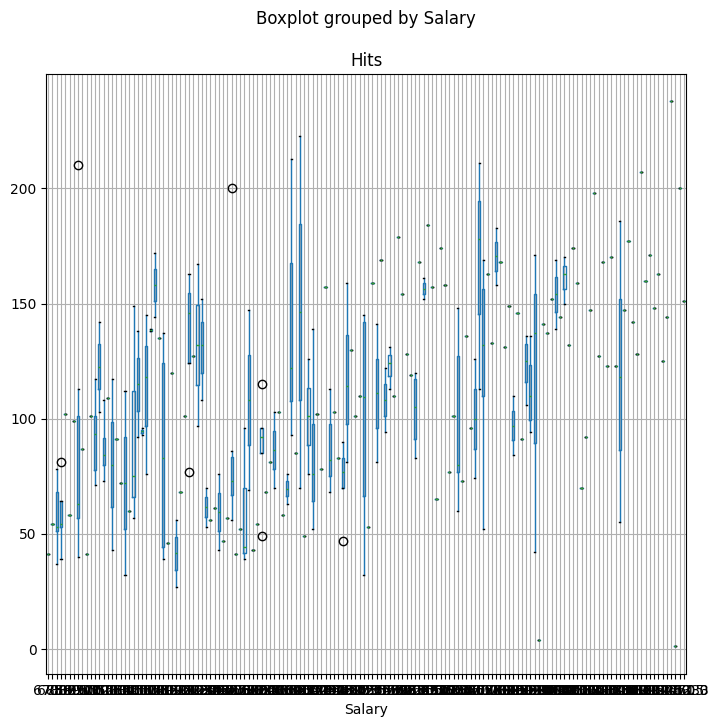

In [59]:
fig, ax = subplots(figsize=(8, 8))
Hitters.boxplot('Hits', by='Salary', ax=ax);


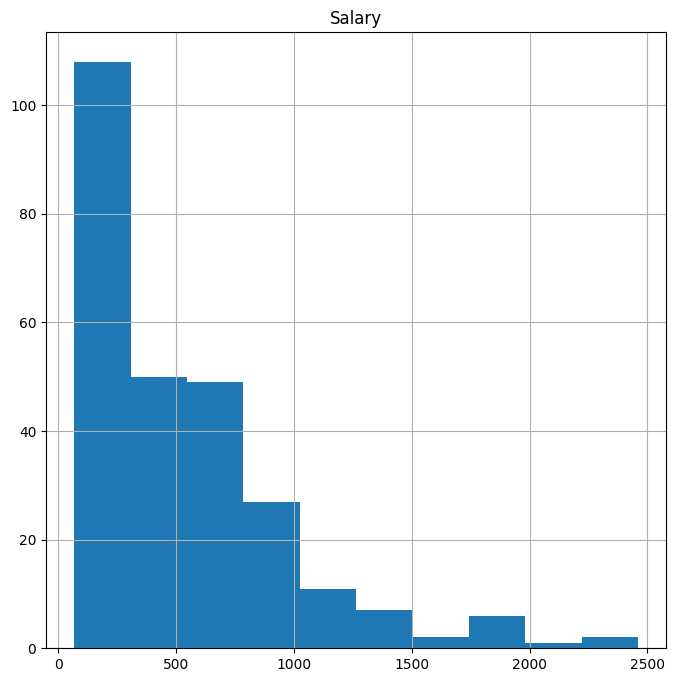

In [60]:
fig, ax = subplots(figsize=(8, 8))
Hitters.hist('Salary', ax=ax);


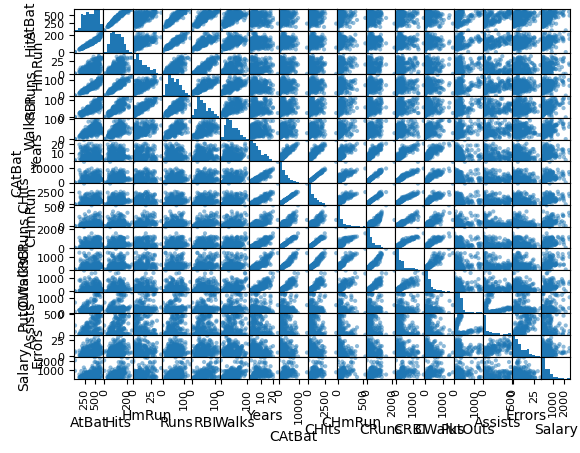

In [62]:
pd.plotting.scatter_matrix(Hitters);

In [63]:
X = pd.concat([X, Hitters], axis=1)
X[:6]


,const,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,1.0,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,1.0,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,1.0,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,1.0,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,1.0,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A
6,1.0,185,37,1,23,8,21,2,214,42,...,30,9,24,N,E,76,127,7,70.0,A


In [64]:
import statsmodels.api as sm

In [75]:
y = Hitters['Salary']
t = Hitters.drop(columns=['NewLeague',"Division",'League','Salary'])

X = sm.add_constant(t)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     17.19
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.02e-31
Time:                        11:27:30   Log-Likelihood:                -1881.4
No. Observations:                 263   AIC:                             3797.
Df Residuals:                     246   BIC:                             3857.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.1055     83.624      1.508      0.1

در مدل بالا یکسری ویژگی ها ربطی به خروجی نداشتن و من اون ها رو حذف کردم و دوباره مدل رو فیت کردم و نتییجه یک مقداری بهتر شد

In [74]:
y = Hitters['Salary']
t = Hitters.drop(columns=['NewLeague',"Division",'League','Salary','RBI','Runs','Years','CAtBat','CHits','CHmRun','Errors','HmRun','Assists'])

X = sm.add_constant(t)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     37.87
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           3.69e-36
Time:                        11:27:09   Log-Likelihood:                -1886.3
No. Observations:                 263   AIC:                             3789.
Df Residuals:                     255   BIC:                             3817.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.5758     62.386      0.779      0.4

در قسمت پایین فیچر هایی که به هم وابستگی دارند رو شناسایی میکنیم و در نتیجه نتیجه کلی بهتر میشود

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(t)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

    Feature         VIF
0     const   17.975012
1     AtBat   22.479369
2      Hits   30.083518
3     HmRun    7.636705
4      Runs   15.117497
5       RBI   11.688503
6     Walks    4.090338
7     Years    9.126253
8    CAtBat  250.064625
9     CHits  495.652060
10   CHmRun   46.283619
11    CRuns  158.681262
12     CRBI  131.202332
13   CWalks   19.730280
14  PutOuts    1.230378
15  Assists    2.700217
16   Errors    2.184223


In [77]:
X = sm.add_constant(t)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     17.19
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           1.02e-31
Time:                        11:27:43   Log-Likelihood:                -1881.4
No. Observations:                 263   AIC:                             3797.
Df Residuals:                     246   BIC:                             3857.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.1055     83.624      1.508      0.1

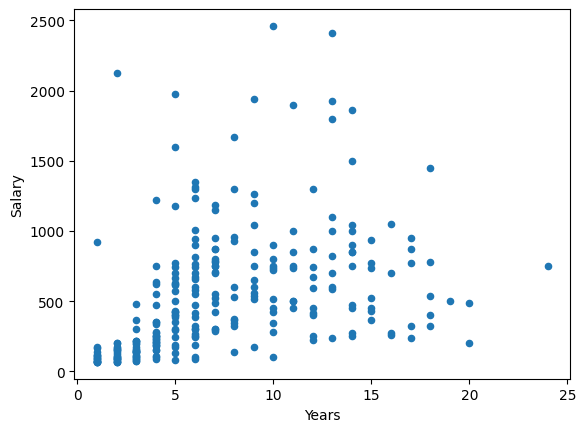

In [88]:
ax = Hitters.plot.scatter('Years', 'Salary')


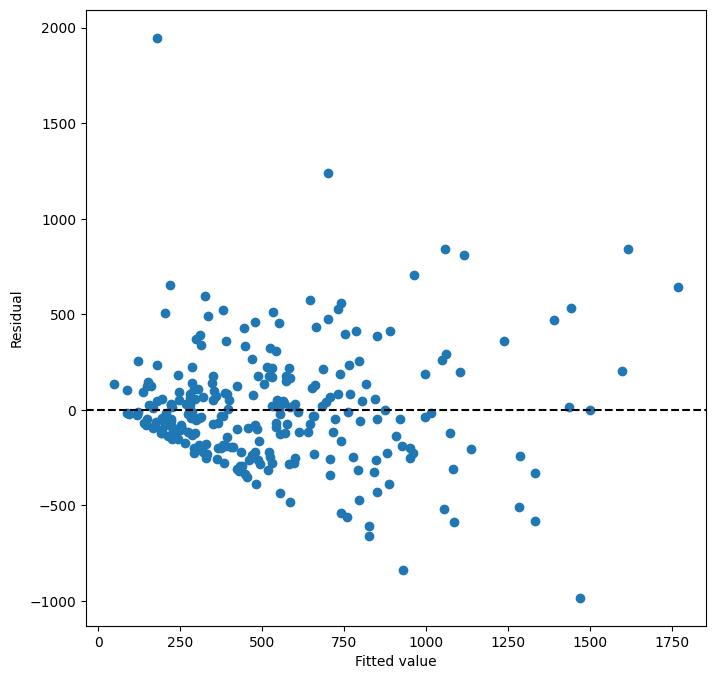

In [85]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


188

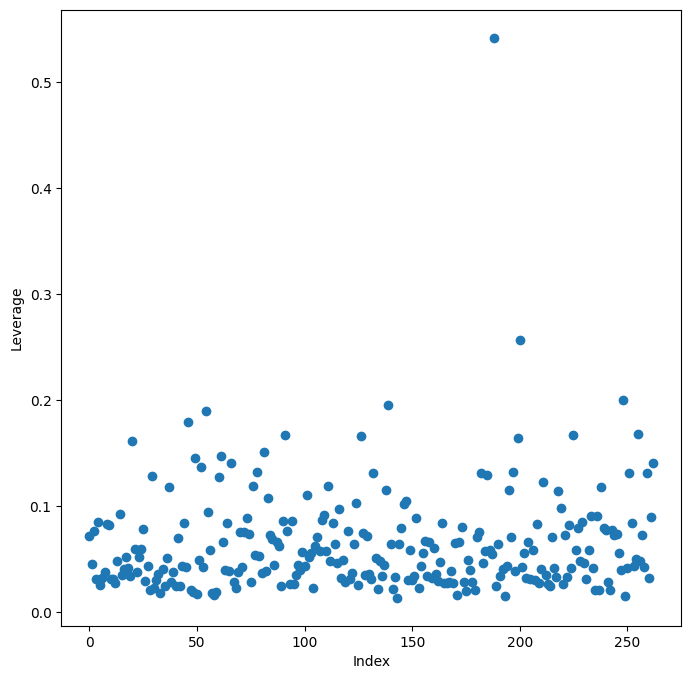

In [86]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
